### Fine-Tuning a Pretrained Model


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import shap
from torchattacks import PGD
from opacus import PrivacyEngine

# Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Load pretrained ResNet18 model and modify it for CIFAR-10
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Fine-tune the model
num_epochs = 5
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

# Save the custom model
torch.save(model.state_dict(), 'resnet18_cifar10.pth')

# Load the custom model
model.load_state_dict(torch.load('resnet18_cifar10.pth'))
model.eval()


Files already downloaded and verified
Files already downloaded and verified


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1, Batch 100, Loss: 1.7677772128582
Epoch 1, Batch 200, Loss: 1.3376576256752015
Epoch 1, Batch 300, Loss: 1.2537098282575607
Epoch 1, Batch 400, Loss: 1.1650401091575622
Epoch 1, Batch 500, Loss: 1.1901906371116637
Epoch 1, Batch 600, Loss: 1.084438029527664
Epoch 1, Batch 700, Loss: 1.0554031586647035
Epoch 1, Batch 800, Loss: 1.0416553497314454
Epoch 1, Batch 900, Loss: 1.0088537693023683
Epoch 1, Batch 1000, Loss: 0.9954504984617233
Epoch 1, Batch 1100, Loss: 0.9942478168010712
Epoch 1, Batch 1200, Loss: 0.9154379117488861
Epoch 1, Batch 1300, Loss: 0.9058884167671204
Epoch 1, Batch 1400, Loss: 0.9042316538095474
Epoch 1, Batch 1500, Loss: 0.9707843604683876
Epoch 2, Batch 100, Loss: 0.823597460091114
Epoch 2, Batch 200, Loss: 0.7924553233385087
Epoch 2, Batch 300, Loss: 0.791119903922081
Epoch 2, Batch 400, Loss: 0.7854743355512619
Epoch 2, Batch 500, Loss: 0.8170013582706451
Epoch 2, Batch 600, Loss: 0.8176823416352272
Epoch 2, Batch 700, Loss: 0.7534994307160378
Epoch 2, B

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1, Batch 100, Loss: 1.2788
Epoch 1, Batch 200, Loss: 0.9221
Epoch 1, Batch 300, Loss: 0.8401
Epoch 1, Batch 400, Loss: 0.7091
Epoch 1, Batch 500, Loss: 0.7438
Epoch 1, Batch 600, Loss: 0.6752
Epoch 1, Batch 700, Loss: 0.6337
Epoch 1, Batch 800, Loss: 0.6452
Epoch 1, Batch 900, Loss: 0.5725
Epoch 1, Batch 1000, Loss: 0.5401
Epoch 1, Batch 1100, Loss: 0.5967
Epoch 1, Batch 1200, Loss: 0.5502
Epoch 1, Batch 1300, Loss: 0.5439
Epoch 1, Batch 1400, Loss: 0.5303
Epoch 1, Batch 1500, Loss: 0.5129
Epoch 1, Validation Loss: 0.4494
Epoch 2, Batch 100, Loss: 0.4210
Epoch 2, Batch 200, Loss: 0.4008
Epoch 2, Batch 300, Loss: 0.3876
Epoch 2, Batch 400, Loss: 0.4032
Epoch 2, Batch 500, Loss: 0.4067
Epoch 2, Batch 600, Loss: 0.4017
Epoch 2, Batch 700, Loss: 0.3721
Epoch 2, Batch 800, Loss: 0.4128
Epoch 2, Batch 900, Loss: 0.4189
Epoch 2, Batch 1000, Loss: 0.3959
Epoch 2, Batch 1100, Loss: 0.3929
Epoch 2, Batch 1200, Loss: 0.3857
Epoch 2, Batch 1300, Loss: 0.3968
Epoch 2, Batch 1400, Loss: 0.3743

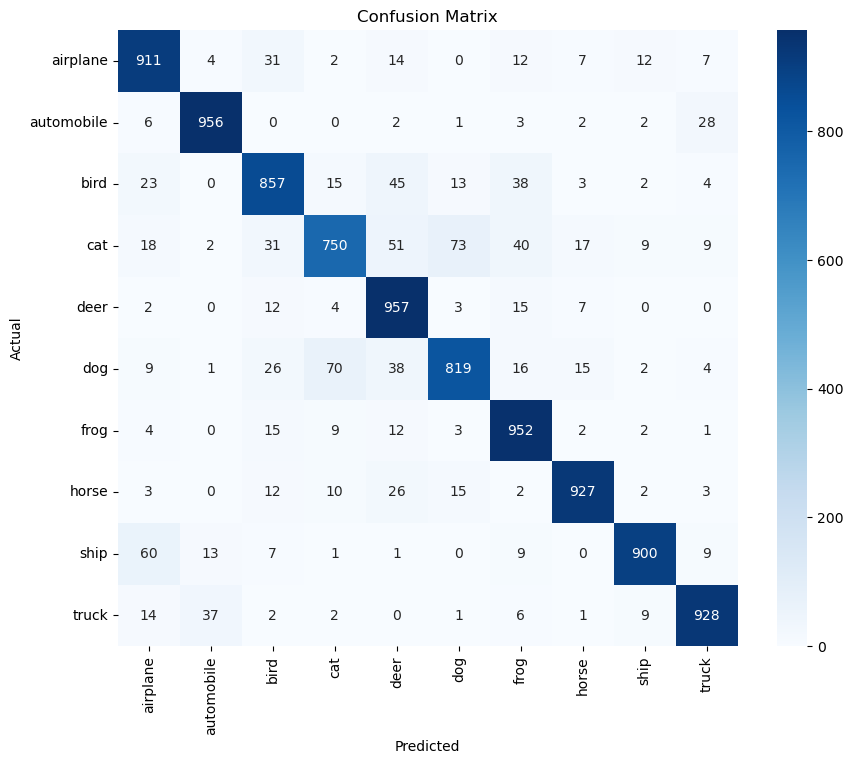

TypeError: unhashable type: 'numpy.ndarray'

In [1]:
## another version of finetuning
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import shap
from torchattacks import PGD
from opacus import PrivacyEngine
import os
from datetime import datetime

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Load pretrained ResNet18 model and modify it for CIFAR-10
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Implement Early Stopping
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping(patience=5, verbose=True)

# Fine-tune the model with early stopping
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
    
    # Validation loss for early stopping
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(testloader)
    print(f'Epoch {epoch + 1}, Validation Loss: {val_loss:.4f}')
    model.train()
    
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

print('Finished Training')

# Save the custom model with a timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_path = f'resnet18_cifar10_{timestamp}.pth'
try:
    torch.save(model.state_dict(), model_path)
    print(f'Model saved successfully at {model_path}')
except Exception as e:
    print(f'Error saving model: {e}')

# Load the custom model
try:
    model.load_state_dict(torch.load(model_path))
    model = model.to(device)
    print('Model loaded successfully')
except Exception as e:
    print(f'Error loading model: {e}')

model.eval()

# Function to evaluate model
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(np.eye(10)[y_true], np.eye(10)[y_pred], multi_class='ovo', average='weighted')
    
    return accuracy, precision, recall, f1, roc_auc

# Evaluate on test set
accuracy, precision, recall, f1, roc_auc = evaluate_model(model, testloader)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions on test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Define CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, cifar10_classes)

# Get predicted probabilities for ROC curve
model.eval()
y_scores = []
y_true_roc = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        y_scores.extend(probs.cpu().numpy())
        y_true_roc.extend(labels.cpu().numpy())

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true_roc))[:, i], np.array(pd.get_dummies(y_scores))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {cifar10_classes[i]} area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Apply Responsible AI Tenets
1. Fairness and Bias Mitigation

In [ ]:

# # Example with class balancing (re-weighting)
# class_counts = np.bincount(trainset.targets)
# weights = 1. / torch.tensor(class_counts, dtype=torch.float)
# sampler = torch.utils.data.WeightedRandomSampler(weights, len(weights))

# trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, sampler=sampler)

# # Retrain with re-weighting
# model.train()
# for epoch in range(num_epochs):
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         inputs, labels = data
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#         if i % 100 == 99:
#             print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
#             running_loss = 0.0

# print('Finished Training with Re-weighting')


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1, Batch 100, Loss: 1.2806
Epoch 1, Batch 200, Loss: 0.9755
Epoch 1, Batch 300, Loss: 0.8059
Epoch 1, Batch 400, Loss: 0.7675
Epoch 1, Batch 500, Loss: 0.7108
Epoch 1, Batch 600, Loss: 0.6833
Epoch 1, Batch 700, Loss: 0.6477
Epoch 1, Batch 800, Loss: 0.6840
Epoch 1, Batch 900, Loss: 0.5864
Epoch 1, Batch 1000, Loss: 0.5516
Epoch 1, Batch 1100, Loss: 0.5505
Epoch 1, Batch 1200, Loss: 0.5613
Epoch 1, Batch 1300, Loss: 0.5123
Epoch 1, Batch 1400, Loss: 0.5027
Epoch 1, Batch 1500, Loss: 0.5557
Epoch 1, Validation Loss: 0.5419
Epoch 2, Batch 100, Loss: 0.4232
Epoch 2, Batch 200, Loss: 0.4047
Epoch 2, Batch 300, Loss: 0.4464
Epoch 2, Batch 400, Loss: 0.4508
Epoch 2, Batch 500, Loss: 0.4062
Epoch 2, Batch 600, Loss: 0.4057
Epoch 2, Batch 700, Loss: 0.3846
Epoch 2, Batch 800, Loss: 0.3948
Epoch 2, Batch 900, Loss: 0.4169
Epoch 2, Batch 1000, Loss: 0.3621
Epoch 2, Batch 1100, Loss: 0.3997
Epoch 2, Batch 1200, Loss: 0.3598
Epoch 2, Batch 1300, Loss: 0.3793
Epoch 2, Batch 1400, Loss: 0.3743

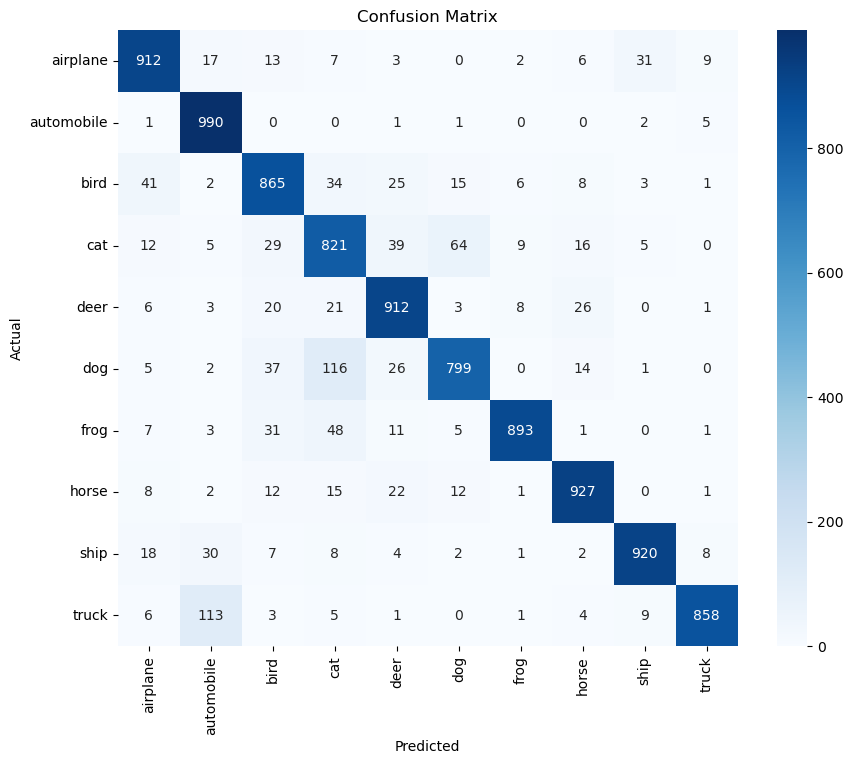

TypeError: unhashable type: 'numpy.ndarray'

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import shap
from torchattacks import PGD
from opacus import PrivacyEngine
import os
from datetime import datetime

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Load pretrained ResNet18 model and modify it for CIFAR-10
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Implement Early Stopping
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping(patience=5, verbose=True)

# Fine-tune the model with early stopping
num_epochs = 50
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
    
    # Validation loss for early stopping
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(testloader)
    print(f'Epoch {epoch + 1}, Validation Loss: {val_loss:.4f}')
    model.train()
    
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

print('Finished Training')

# Save the custom model with a timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_path = f'resnet18_cifar10_{timestamp}.pth'
try:
    torch.save(model.state_dict(), model_path)
    print(f'Model saved successfully at {model_path}')
except Exception as e:
    print(f'Error saving model: {e}')

# Load the custom model
try:
    model.load_state_dict(torch.load(model_path))
    model = model.to(device)
    print('Model loaded successfully')
except Exception as e:
    print(f'Error loading model: {e}')

model.eval()

# Function to evaluate model
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(np.eye(10)[y_true], np.eye(10)[y_pred], multi_class='ovo', average='weighted')
    
    return accuracy, precision, recall, f1, roc_auc

# Evaluate on test set
accuracy, precision, recall, f1, roc_auc = evaluate_model(model, testloader)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions on test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Define CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, cifar10_classes)

# Get predicted probabilities for ROC curve
model.eval()
y_scores = []
y_true_roc = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        y_scores.extend(probs.cpu().numpy())
        y_true_roc.extend(labels.cpu().numpy())

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true_roc))[:, i], np.array(pd.get_dummies(y_scores))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {cifar10_classes[i]} area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### 2. Transparency and Explainability


Using device: cuda
Files already downloaded and verified
Files already downloaded and verified


The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1, Batch 100, Loss: 1.3061
Epoch 1, Batch 200, Loss: 0.9902
Epoch 1, Batch 300, Loss: 0.7972
Epoch 1, Batch 400, Loss: 0.8195
Epoch 1, Batch 500, Loss: 0.7519
Epoch 1, Batch 600, Loss: 0.6974
Epoch 1, Batch 700, Loss: 0.6865
Epoch 1, Batch 800, Loss: 0.6488
Epoch 1, Batch 900, Loss: 0.6000
Epoch 1, Batch 1000, Loss: 0.5716
Epoch 1, Batch 1100, Loss: 0.5870
Epoch 1, Batch 1200, Loss: 0.6026
Epoch 1, Batch 1300, Loss: 0.5571
Epoch 1, Batch 1400, Loss: 0.4781
Epoch 1, Batch 1500, Loss: 0.4838
Epoch 1, Validation Loss: 0.4949
Epoch 2, Batch 100, Loss: 0.4168
Epoch 2, Batch 200, Loss: 0.4071
Epoch 2, Batch 300, Loss: 0.4281
Epoch 2, Batch 400, Loss: 0.4316
Epoch 2, Batch 500, Loss: 0.4342
Epoch 2, Batch 600, Loss: 0.4039
Epoch 2, Batch 700, Loss: 0.4175
Epoch 2, Batch 800, Loss: 0.4333
Epoch 2, Batch 900, Loss: 0.4263
Epoch 2, Batch 1000, Loss: 0.3777
Epoch 2, Batch 1100, Loss: 0.3981
Epoch 2, Batch 1200, Loss: 0.4051
Epoch 2, Batch 1300, Loss: 0.3729
Epoch 2, Batch 1400, Loss: 0.3842

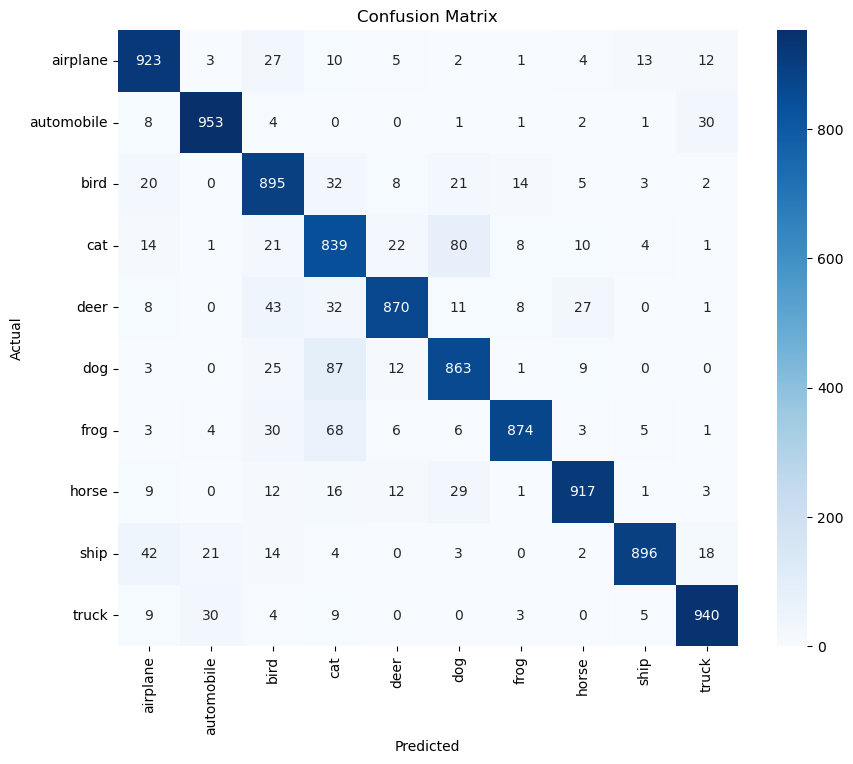

TypeError: unhashable type: 'numpy.ndarray'

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)

# Load pretrained ResNet18 model and modify it for CIFAR-10
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Implement Early Stopping
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta

    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

early_stopping = EarlyStopping(patience=5, verbose=True)

# Fine-tune the model with early stopping
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.4f}')
            running_loss = 0.0
    
    # Validation loss for early stopping
    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(testloader)
    print(f'Epoch {epoch + 1}, Validation Loss: {val_loss:.4f}')
    
    early_stopping(val_loss, model)
    if early_stopping.early_stop:
        print("Early stopping")
        break

print('Finished Training')

# Save the custom model with a timestamp
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
model_path = f'resnet18_cifar10_{timestamp}.pth'
try:
    torch.save(model.state_dict(), model_path)
    print(f'Model saved successfully at {model_path}')
except Exception as e:
    print(f'Error saving model: {e}')

# Load the custom model
try:
    model.load_state_dict(torch.load(model_path))
    model = model.to(device)
    print('Model loaded successfully')
except Exception as e:
    print(f'Error loading model: {e}')

model.eval()

# Function to evaluate model
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(np.eye(10)[y_true], np.eye(10)[y_pred], multi_class='ovo', average='weighted')
    
    return accuracy, precision, recall, f1, roc_auc

# Evaluate on test set
accuracy, precision, recall, f1, roc_auc = evaluate_model(model, testloader)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions on test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Define CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, cifar10_classes)

# Get predicted probabilities for ROC curve
model.eval()
y_scores = []
y_true_roc = []
with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        y_scores.extend(probs.cpu().numpy())
        y_true_roc.extend(labels.cpu().numpy())

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true_roc))[:, i], np.array(pd.get_dummies(y_scores))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {cifar10_classes[i]} area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### 3. Robustness and Safety


In [ ]:
# Adversarial attack using PGD
attack = PGD(model, eps=0.3, alpha=2/255, steps=40)
X_test_tensor = torch.tensor(testset_resized.data, dtype=torch.float) / 255
y_test_tensor = torch.tensor(testset_resized.targets, dtype=torch.long)
X_test_adv = attack(X_test_tensor, y_test_tensor)

# Evaluate the model on adversarial examples
model.eval()
with torch.no_grad():
    outputs_adv = model(X_test_adv)
    _, y_pred_adv = torch.max(outputs_adv, 1)

# Compute metrics for adversarial examples
accuracy_adv = accuracy_score(y_test_tensor, y_pred_adv)
precision_adv = precision_score(y_test_tensor, y_pred_adv, average='weighted')
recall_adv = recall_score(y_test_tensor, y_pred_adv, average='weighted')
f1_adv = f1_score(y_test_tensor, y_pred_adv, average='weighted')
roc_auc_adv = roc_auc_score(y_test_tensor, np.eye(10)[y_pred_adv], multi_class='ovo', average='weighted')

# Print metrics for adversarial examples
print(f'Adversarial Accuracy: {accuracy_adv}')
print(f'Adversarial Precision: {precision_adv}')
print(f'Adversarial Recall: {recall_adv}')
print(f'Adversarial F1 Score: {f1_adv}')
print(f'Adversarial ROC AUC: {roc_auc_adv}')

# Plot confusion matrix for adversarial examples
conf_matrix_adv = confusion_matrix(y_test_tensor, y_pred_adv)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_adv, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Adversarial Examples)')
plt.show()


### 4. Accountability and Governance


In [ ]:
# Model documentation and logging
import logging

logging.basicConfig(filename='model_training.log', level=logging.INFO)
logging.info(f'Finished Training. Final Epoch: {num_epochs}, Final Loss: {running_loss}')

# Compliance check (example code, this is a placeholder for actual compliance checks)
def compliance_check(model):
    # Dummy function, replace with actual checks
    return True

if compliance_check(model):
    logging.info('Model passed compliance check.')
else:
    logging.error('Model failed compliance check.')


In [ ]:
## 5. Privacy and Security


In [ ]:
# Differential Privacy with Opacus
privacy_engine = PrivacyEngine(
    model,
    batch_size=32,
    sample_size=len(trainset_resized),
    alphas=[10, 100],
    noise_multiplier=1.0,
    max_grad_norm=1.0,
)
privacy_engine.attach(optimizer)

# Retrain with differential privacy
model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader_resized, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training with Differential Privacy')


### Evaluating and Plotting Results


In [ ]:
# Function to evaluate model
def evaluate_model(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(np.eye(10)[y_true], np.eye(10)[y_pred], multi_class='ovo', average='weighted')
    
    return accuracy, precision, recall, f1, roc_auc

# Evaluate on test set
accuracy, precision, recall, f1, roc_auc = evaluate_model(model, testloader_resized)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')


#### Plotting Results
1. Confusion Matrix

In [ ]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Get predictions on test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in testloader_resized:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Define CIFAR-10 classes
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred, cifar10_classes)


2. ROC Curve


In [ ]:
# Get predicted probabilities for ROC curve
model.eval()
y_scores = []
y_true_roc = []
with torch.no_grad():
    for inputs, labels in testloader_resized:
        outputs = model(inputs)
        probs = torch.softmax(outputs, dim=1)
        y_scores.extend(probs.cpu().numpy())
        y_true_roc.extend(labels.cpu().numpy())

# Compute ROC curve and ROC AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_true_roc))[:, i], np.array(pd.get_dummies(y_scores))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {cifar10_classes[i]} area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Summary
1. Accuracy: The overall accuracy of the model on the test set.
2. Precision, Recall, F1 Score: Metrics for evaluating classification performance.
3. Confusion Matrix: Visual representation of model predictions vs. actual labels.
4. ROC Curve: Plot to evaluate model performance across different classes using ROC AUC.
* These visualizations and metrics provide insights into how well the model performs on CIFAR-10 after applying Responsible AI tenets and fine-tuning. * Adjust the evaluation and plotting based on specific requirements and additional Responsible AI considerations like fairness, privacy, and robustness.